In [1]:
import tensorflow as tf

In [2]:
autoencoder = tf.keras.models.load_model('autoencoder')

In [5]:
import numpy as np
import cv2

def preprocess_imgs(img, mask):
    
    # change channels
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    # normalize
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    mask = cv2.normalize(mask, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    # resize
    img = cv2.resize(img, (128, 128))
    mask = cv2.resize(mask, (128, 128))
    
    return img, mask

def read_img(img_num):
    
    img_path = "Water Bodies Dataset/Images/water_body_"+ img_num +".jpg"
    mask_path = "Water Bodies Dataset/Masks/water_body_"+ img_num +".jpg"

    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    
    return img, mask

def get_img_nums():
    from os import listdir
    from os.path import isfile, join
    onlyfiles = [f for f in listdir("Water Bodies Dataset/Masks/") if isfile(join("Water Bodies Dataset/Masks/", f))]
    return [x[11:-4] for x in onlyfiles]


def load_data(N=None):
    imgs = []
    masks = []
    
    if N :
      for i in get_img_nums()[:N] :
          img, mask = read_img(i)
          img, mask = preprocess_imgs(img, mask)
          
          imgs.append(img)
          masks.append(mask)
    else :
      for i in get_img_nums() :
          img, mask = read_img(i)
          img, mask = preprocess_imgs(img, mask)
          
          imgs.append(img)
          masks.append(mask)
    
    return np.array(imgs), np.array(masks)


In [6]:
imgs, masks = load_data()

imgs_train, imgs_test = imgs[:2000], imgs[2000:]
masks_train, masks_test = masks[:2000], masks[2000:]
imgs_train.shape, masks_test.shape

((2000, 128, 128, 3), (841, 128, 128))

In [ ]:
preds_test = autoencoder.predict(imgs_test)

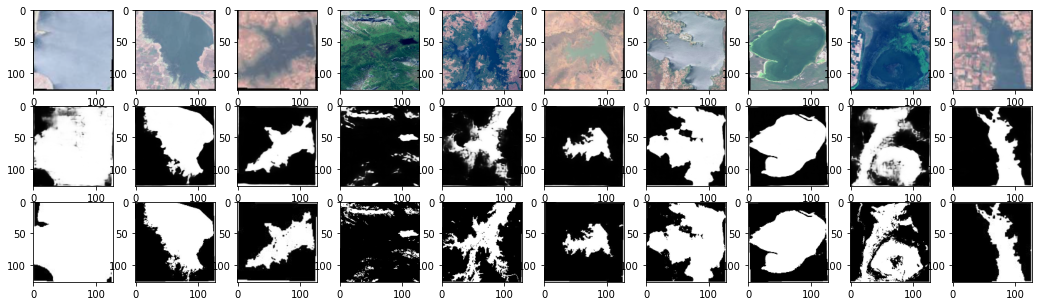

In [12]:
import matplotlib.pyplot as plt

k=4
fig, ax = plt.subplots(figsize=(18, 5))

for i in range(1,11):
    plt.subplot(3,10,i)
    plt.imshow(imgs_test[k*10+i-1], cmap='gray')
    plt.subplot(3,10,10+i)
    plt.imshow(preds_test[k*10+i-1], cmap='gray')
    plt.subplot(3,10,20+i)
    plt.imshow(masks_test[k*10+i-1], cmap='gray')